<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline March 20th 2019, 24:00</h3>
Return this notebook with your code and answers.

# Exercise 1

<h3 style="color:rgb(0,120,170)">Question 1.1:</h3>
Suppose we have a two-class classification problem, where we denote
the two classes with $+1$ and $-1$. Further assume that the joint
distribution of $\mathbf{x}$ and $y$, $p(\mathbf{x},y)$, is known and that
the distributions of the two classes do not overlap, i.e.
$$
\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0.
$$
Determine an optimal classification function $g$ and compute the
generalization error using the zero-one loss function.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.1:</h3>

Risk $R$ is defined as follows: 
$$
R(g(.; \mathbf{w})) = E_Z(L(y, g(\mathbf{x}; \mathbf{w}))) = \int_Z L(y, g(\mathbf{x}; \mathbf{w})) p(\mathbf{z}) d\mathbf{z}
$$

The zero-one-loss is defined as follows: 
$$
L(y, g(\mathbf{x}; \mathbf{w})) = \begin{cases} 0 ~~~ \text{for} ~ y = g(\mathbf{x}, \mathbf{w}) \\ 1 ~~~ \text{for} ~ y \neq g(\mathbf{x}, \mathbf{w}) \end{cases} \text{or for classes \{+1, -1\}} \begin{cases} 0 ~~~ \text{for} ~ y \cdot g(\mathbf{x}, \mathbf{w}) > 0 \\ 1 ~~~ \text{for} ~ y \cdot g(\mathbf{x}, \mathbf{w}) < 0 \end{cases}
$$
for which we can further define regions: 
- of class $1$ as $X_1 = \{\mathbf{x} ~ | ~ g(\mathbf{x}) > 0 \}$
- of class $-1$ as $X_{-1} = \{\mathbf{x} ~ | ~ g(\mathbf{x}) < 0 \}$

Using the zero-one-loss we get: 
$$
R(g(.; \mathbf{w})) = \int_{X_1} p(y = -1 | \mathbf{x} p(\mathbf{x}) d\mathbf{x} + \int_{X_{-1}} p(y = 1 | \mathbf{x} p(\mathbf{x}) d\mathbf{x} \\
R(g(.; \mathbf{w})) = \int_X \begin{cases} p(y = -1 | \mathbf{x}) & \text{for} & g(\mathbf{x}) > 0 \\ p(y = 1 | \mathbf{x}) & \text{for} & g(\mathbf{x}) < 0 \end{cases} p(\mathbf{x}) d\mathbf{x}
$$

The risk $R$ gets minimized by choosing the smaller value, therefore:
$$
R_{min} = \int_X \text{min} \{p(y = -1 | \mathbf{x}), p(y = 1 | \mathbf{x})\} p(\mathbf{x}) d\mathbf{x} 
$$
But since we know $\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0.$: $R_{min} = 0$


In general, a discriminant function $g$ is defined as: 
$$
g(\mathbf{x}) = p(y = 1 | \mathbf{x}) - p(y = -1 | \mathbf{x})
$$
But since we know $\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0.$ this simplifies to:
$$
g(\mathbf{x}) = \begin{cases} \text{+1} & \text{if} & p(y=+1 | \mathbf{x}) > 0 \\ \text{-1} & \text{if} & p(y=-1 | \mathbf{x}) > 0 \end{cases}
$$

# Exercise 2


Assume that the two classes in data set ${\tt DataSet6}$ are
distributed according to multivariate normal distributions. 
<h3 style="color:rgb(0,120,170)">Question 2.1:</h3>
Estimate the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$
from the data and print your results. 

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 2.1:</h3>

In [1]:
import sklearn

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D

#read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet6.csv', delimiter=',')
X, y = Z[1:, :-1], Z[1:, -1]  # changed to ignore nan at beginning

#further split features according to labels
Xpos = X[y == 1]
Xneg = X[y == -1]

#compute mean and covariance
meanXpos = Xpos.mean(axis=0)
meanXneg = Xneg.mean(axis=0)
covXpos = np.cov(Xpos[:, 0], Xpos[:, 1])
covXneg = np.cov(Xneg[:, 0], Xneg[:, 1])

#compute distribution p(y=+-1)
p_ypos = len(Xpos) / len(y)
p_yneg = len(Xneg) / len(y)

#print corresponding values(nothing to do here)
print("Cov of positve class=", covXpos)
print("Cov of negative class=", covXneg)
print("Mean of positve class=", meanXpos)
print("Mean of negative class=", meanXneg)
print("P(y=1)=", p_ypos)
print("P(y=-1)=", p_yneg)

Cov of positve class= [[ 0.97776086 -0.63279722]
 [-0.63279722  0.96214327]]
Cov of negative class= [[1.18686086 0.55312556]
 [0.55312556 0.98948508]]
Mean of positve class= [-0.23072318  1.0973771 ]
Mean of negative class= [0.72081505 2.3428049 ]
P(y=1)= 0.675
P(y=-1)= 0.325


Under the assumptions of normal distribution, the densities of the two classes can be visualized as follows:

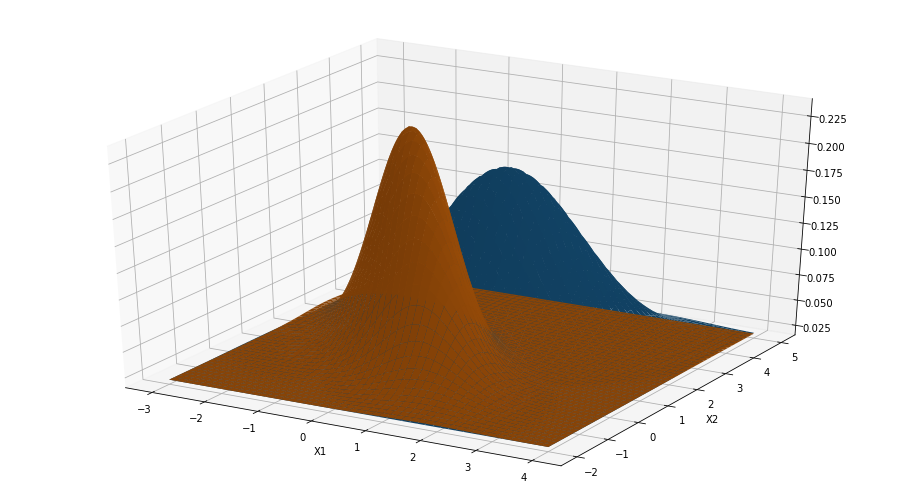

In [2]:
#nothing to do here

x, y = np.mgrid[-3.0:4.0:500j, -2.0:5.0:100j]
xy = np.column_stack([x.flat, y.flat])

z1 = multivariate_normal.pdf(xy, mean=meanXpos, cov=covXpos)
z1 = z1.reshape(x.shape)
z2 = multivariate_normal.pdf(xy, mean=meanXneg, cov=covXneg)
z2 = z2.reshape(x.shape)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z2 + 0.02)
ax.plot_surface(x, y, z1 + 0.02)

#additive factors for better visibility
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

<h3 style="color:rgb(0,120,170)">Question 2.2:</h3>
Compute an optimal
classification function $g$ (see slide 11) by calculating the values of the corresponding parameters $\mathbf{A}$, $\mathbf{w}$ and $b$.

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 2.2:</h3>

In [3]:
#compute parameters of discrimination function g according to slide 11
covXposInv, covXnegInv = np.linalg.inv(covXpos), np.linalg.inv(covXneg)
A = covXposInv - covXnegInv
w = (covXposInv @ meanXpos) - (covXnegInv @ meanXneg)
b = 0.5 * (-(meanXpos.T @ covXposInv @ meanXpos) +
           (meanXneg.T @ covXnegInv @ meanXneg) - np.log(np.linalg.det(covXpos)) +
           np.log(np.linalg.det(covXneg))) + np.log(p_ypos) - np.log(p_yneg)

#Print corresponding values(nothing to do here)
print("Value of A=", A)
print("Value of w=", w)
print("Value of b=", b)

Value of A= [[0.64132121 1.80808986]
 [1.80808986 0.44294787]]
Value of w= [ 1.54525683 -1.02711802]
Value of b= 3.0987360693633565


<h3 style="color:rgb(0,120,170)">Question 2.3:</h3>
Visualize the classification function and the decision boundaries in a two-dimensional plot.

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 2.3:</h3>

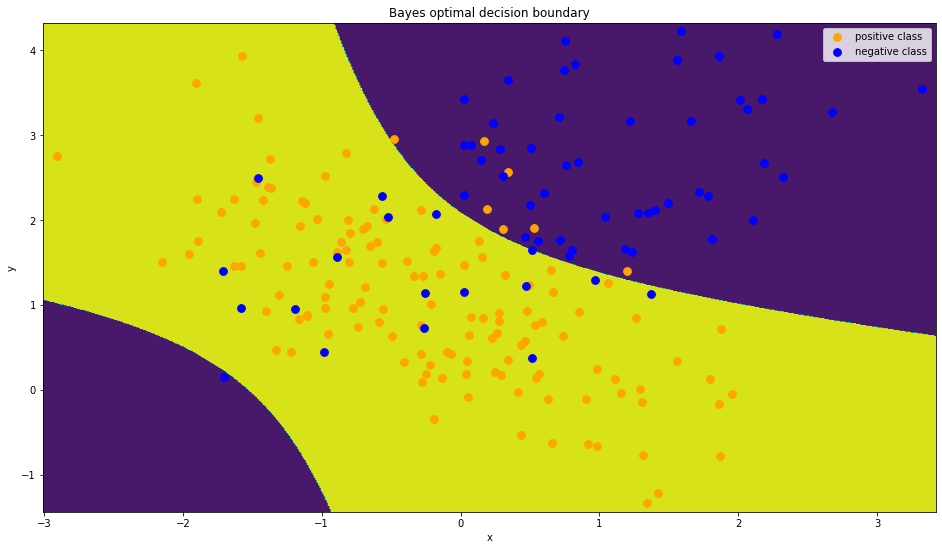

In [4]:
def g(x, A, w, b):
    """Discriminant function for point x"""
    return -1 / 2 * (x.T @ A @ x) + (w.T @ x) + b


def classify(x):
    """Classification function for point x"""
    return np.sign(g(x, A, w, b))


# Grid for calculating classification
delta = 0.01
x, y = np.meshgrid(np.arange(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, delta),
                   np.arange(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, delta))
grid = np.column_stack((x.ravel(), y.ravel()))

# classifying points
classified = np.asarray([classify(point) for point in grid]).reshape(x.shape)

# plotting
fig, ax = plt.subplots(figsize=(16, 9))
ax.contourf(x, y, classified)
ax.scatter(Xpos[:, 0], Xpos[:, 1], c='orange', s=60, label='positive class')
ax.scatter(Xneg[:, 0], Xneg[:, 1], c='blue', s=60, label='negative class')
ax.legend()

plt.title('Bayes optimal decision boundary')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Exercise 3


<h3 style="color:rgb(0,120,170)">Question 3.1:</h3>
Given the model class $M$ of all exponential distributions with 
parameter
$\lambda$.
i.e. $M=\{f_{\lambda}(x) \mid \lambda > 0\}$ with
$$
      f_{\lambda}(x) = \begin{cases}\displaystyle
                         \lambda {\rm e}^{-\lambda x} & x \ge 0 \\
			0 & x < 0
                      \end{cases} 
$$
Derive a formula for the maximum likelihood estimator $\lambda^*$ for the parameter 
$\lambda$.

Hint: Maximize the logarithm of the likelihood function instead of the 
likelihood function
itself.
* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 3.1:</h3>

We need to maximize the likelihood function of $f_{\lambda}(x)$. 
$$
L(\lambda) = \prod_i^n f_{\lambda}(x)
$$

We use the log-likelihood since the monotonicity does not change:
$$
\text{ln} L(\lambda) = \underbrace{\text{ln} \prod_i^n f_{\lambda}(x)}_\text{rewrite as sum of logarithms} = \\
\text{ln} L(\lambda) = \underbrace{\sum_i^n \text{ln} \lambda e^{-\lambda x_i}}_\text{ln(ab) = ln(a) + ln(b)} = \\
\text{ln} L(\lambda) = \sum_i^n \underbrace{\text{ln} \lambda}_\text{constant} + \text{ln}  e^{-\lambda x_i} = \\
\text{ln} L(\lambda) = n \text{ln}\lambda - \sum_i^n \underbrace{\lambda}_\text{constant} x_i = \\
\text{ln} L(\lambda) = n \text{ln}\lambda - \lambda \sum_i^n x_i
$$

We now take the derivative of $\text{ln} L(\lambda)$:
$$
\frac{\delta}{\delta \lambda} \text{ln} L(\lambda) = \frac{\delta}{\delta \lambda} n \text{ln}\lambda - \lambda \sum_i^n x_i = \\
\frac{\delta}{\delta \lambda} \text{ln} L(\lambda) = \frac{n}{\lambda} - \sum_i^n x_i
$$

We show that the second derivative is negative $\xrightarrow{}$ MLE is maximum:

$$
\frac{\delta}{\delta \lambda^2} \text{ln} L(\lambda) = \frac{\delta}{\delta \lambda}(\frac{n}{\lambda} - \underbrace{\sum_i^n x_i}_\text{constant}) = \\
\frac{\delta}{\delta \lambda^2} \text{ln} L(\lambda) = -\frac{1}{\lambda^2}
$$

We can now solve for 0 in the first derivative:
$$
\frac{n}{\lambda} - \sum_i^n x_i = 0 \\
\frac{n}{\lambda} = \sum_i^n x_i \\
\lambda = \underbrace{\frac{n}{\sum_i^n x_i}}_{\lambda^*}
$$

<h3 style="color:rgb(0,120,170)">Question 3.2:</h3>
 Apply the formula for $\lambda^*$ from the previous part to the data of ${\tt DataSet7}$. Visualize the 
density defined by this optimal $\lambda^*$ and compare it to the 
true data distribution (e.g. by using a histogram).

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 3.2:</h3>

Calculated MLE from data: 3.1172808696345493


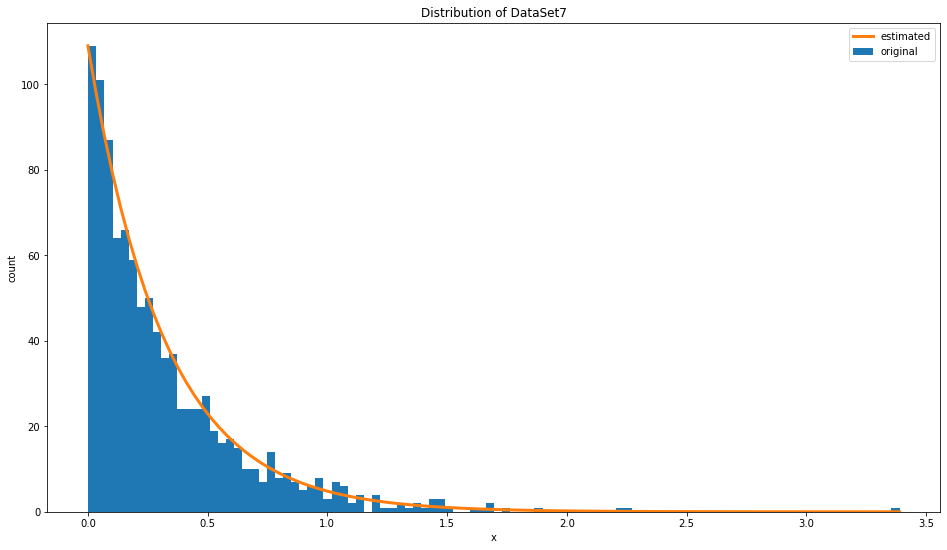

In [5]:
# load the data
data = np.genfromtxt('DataSet7.csv', delimiter=',', skip_header=1)


# your remaining code goes here
def mle_exponential(data):
    return len(data) / data.sum()


mle = mle_exponential(data)
print(f'Calculated MLE from data: {mle}')

plt.figure(figsize=(16, 9))
max_count = plt.hist(data, bins=100)[0].max()
# estimation
x = np.linspace(0, data.max(), 100)
y = mle * np.exp(-mle * x)
# normalisation to use in same plot
plt.plot(x, y / y[0] * max_count, linewidth=3)
plt.title('Distribution of DataSet7')
plt.legend(['estimated', 'original'])
plt.xlabel('x')
plt.ylabel('count')
plt.show()